In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np

### Data Loading / Cleaning

In [2]:
data_path = r"C:\Users\nilap_d3dyn7h\OneDrive\Documents\airline.csv"

In [3]:
main_df = pd.read_csv(data_path)
main_df.head(10)

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1
5,Jan-85,Adelaide,Muscat,Oman,17,0.000,0.000,14,0.100,0.000,31,0.100,0.000,1985,1
6,Jan-85,Adelaide,Rome,Italy,79,0.005,0.000,44,0.000,0.000,123,0.005,0.000,1985,1
7,Jan-85,Adelaide,Singapore,Singapore,2496,37.345,0.000,2037,133.203,0.112,4533,170.548,0.112,1985,1
8,Jan-85,Brisbane,Abu Dhabi,United Arab Emirates,0,0.000,0.000,3,0.000,0.000,3,0.000,0.000,1985,1
9,Jan-85,Brisbane,Auckland,New Zealand,7157,223.258,0.671,5652,33.032,3.218,12809,256.290,3.889,1985,1


In [4]:
main_df.describe()

,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,1489.993499,57.578618,1.326173,1439.835784,66.320506,2.065110,2929.829283,123.899124,3.391284,1986.862086,6.199620
std,3101.650858,150.503467,5.735984,3065.381839,165.840735,6.493602,6130.619566,297.553857,10.399799,1.300700,3.442343
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000,1.000000
25%,45.000000,0.000000,0.000000,51.000000,0.000000,0.000000,100.000000,0.050000,0.000000,1986.000000,3.000000
50%,333.000000,2.117000,0.000000,324.000000,5.200000,0.007000,664.000000,13.100000,0.041000,1987.000000,6.000000
75%,1586.000000,41.666000,0.224500,1535.500000,58.666000,1.061500,3131.500000,93.722500,1.517500,1988.000000,9.000000
max,37754.000000,1795.482000,110.518000,38475.000000,1899.032000,103.111000,70014.000000,3242.982000,197.697000,1989.000000,12.000000


In [5]:
main_df.columns

Index(['Month', 'AustralianPort', 'ForeignPort', 'Country', 'Passengers_In',
       'Freight_In_(tonnes)', 'Mail_In_(tonnes)', 'Passengers_Out',
       'Freight_Out_(tonnes)', 'Mail_Out_(tonnes)', 'Passengers_Total',
       'Freight_Total_(tonnes)', 'Mail_Total_(tonnes)', 'Year', 'Month_num'],
      dtype='object')

In [6]:
main_df.dtypes

Month                      object
AustralianPort             object
ForeignPort                object
Country                    object
Passengers_In               int64
Freight_In_(tonnes)       float64
Mail_In_(tonnes)          float64
Passengers_Out              int64
Freight_Out_(tonnes)      float64
Mail_Out_(tonnes)         float64
Passengers_Total            int64
Freight_Total_(tonnes)    float64
Mail_Total_(tonnes)       float64
Year                        int64
Month_num                   int64
dtype: object

### Understanding the Data

#### 1a

In [7]:
# Aggregate passenger totals by route
main_df["Route"] = main_df["AustralianPort"].astype(str).str.strip() + "-" + main_df["ForeignPort"].astype(str).str.strip()
route_totals = main_df.groupby("Route")["Passengers_Total"].sum().sort_values(ascending=False)

In [8]:
# Top 10 busiest routes
top_routes = route_totals.head(10)
print("Top 10 busiest routes:")
top_routes

Top 10 busiest routes:


Route
Sydney-Auckland        2961212
Sydney-Singapore       1440018
Sydney-Tokyo           1292116
Sydney-Hong Kong       1151900
Perth-Singapore         952926
Brisbane-Auckland       893246
Sydney-Christchurch     882357
Melbourne-Singapore     865251
Sydney-Los Angeles      862964
Sydney-Honolulu         861814
Name: Passengers_Total, dtype: int64

In [9]:
# 10 least busy routes
bottom_routes = route_totals.tail(10)
print("top 10 least trafficked routes:")
bottom_routes

top 10 least trafficked routes:


Route
Hobart-Los Angeles           2
Hobart-Tokyo                 1
Cairns-Honiara               1
Townsville-San Francisco     1
Darwin-Zagreb                1
Melbourne-Denver             0
Perth-Bandar Seri Begawan    0
Brisbane-Colombo             0
Adelaide-Harare              0
Brisbane-Chicago             0
Name: Passengers_Total, dtype: int64

#### Directional pairs now
Earlier, I just aggregated based on total_passengers, meaning it was the total amount for a given city pair and direction agnostic. Getting just directional route data could also be helpful for an airline, so below will be route rankings with directionality (pretty much just means separating city1 -> city2 and city2 -> city 1). Since this airline's hub is Australia, that will be always be included and the format will be either outbound (Aussie → Foreign) or inbound (Foreign → Aussie).

In [10]:
# Outbound
outbound_routes = (
    main_df.groupby(["AustralianPort", "ForeignPort"])["Passengers_Out"]
    .sum()
    .sort_values(ascending=False)
)

print("Top 10 outbound routes (AUS → Foreign):")
outbound_routes.head(10)

Top 10 outbound routes (AUS → Foreign):


AustralianPort  ForeignPort 
Sydney          Auckland        1475162
                Tokyo            703995
                Singapore        695456
                Hong Kong        539472
Perth           Singapore        465668
Brisbane        Auckland         454359
Sydney          Los Angeles      442749
                Christchurch     427708
                Honolulu         422481
Melbourne       Singapore        410428
Name: Passengers_Out, dtype: int64

In [11]:
# Inbound
inbound_routes = (
    main_df.groupby(["AustralianPort", "ForeignPort"])["Passengers_In"]
    .sum()
    .sort_values(ascending=False)
)

print("Top 10 inbound routes (Foreign → AUS):")
inbound_routes.head(10)

Top 10 inbound routes (Foreign → AUS):


AustralianPort  ForeignPort 
Sydney          Auckland        1486050
                Singapore        744562
                Hong Kong        612428
                Tokyo            588121
Perth           Singapore        487258
Melbourne       Singapore        454823
Sydney          Christchurch     454649
                Honolulu         439333
Brisbane        Auckland         438887
Sydney          Los Angeles      420215
Name: Passengers_In, dtype: int64

#### 1b

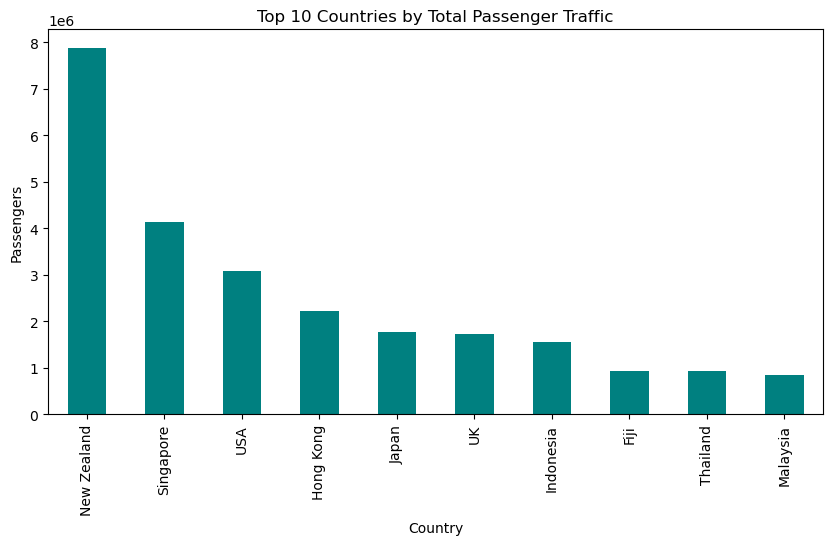

In [14]:
country_totals = main_df.groupby("Country")["Passengers_Total"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
country_totals.plot(kind="bar", color="teal")
plt.title("Top 10 Countries by Total Passenger Traffic")
plt.ylabel("Passengers")
plt.show()

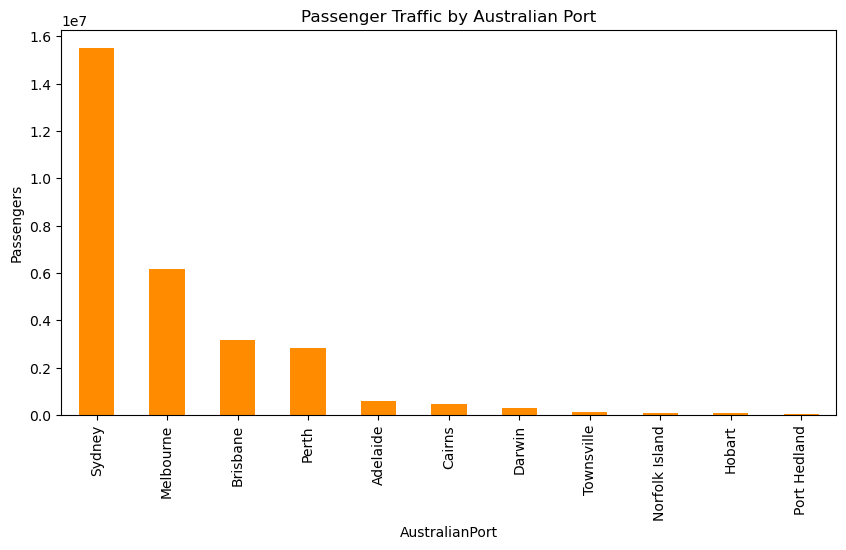

In [15]:
aussie_totals = main_df.groupby("AustralianPort")["Passengers_Total"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
aussie_totals.plot(kind="bar", color="darkorange")
plt.title("Passenger Traffic by Australian Port")
plt.ylabel("Passengers")
plt.show()

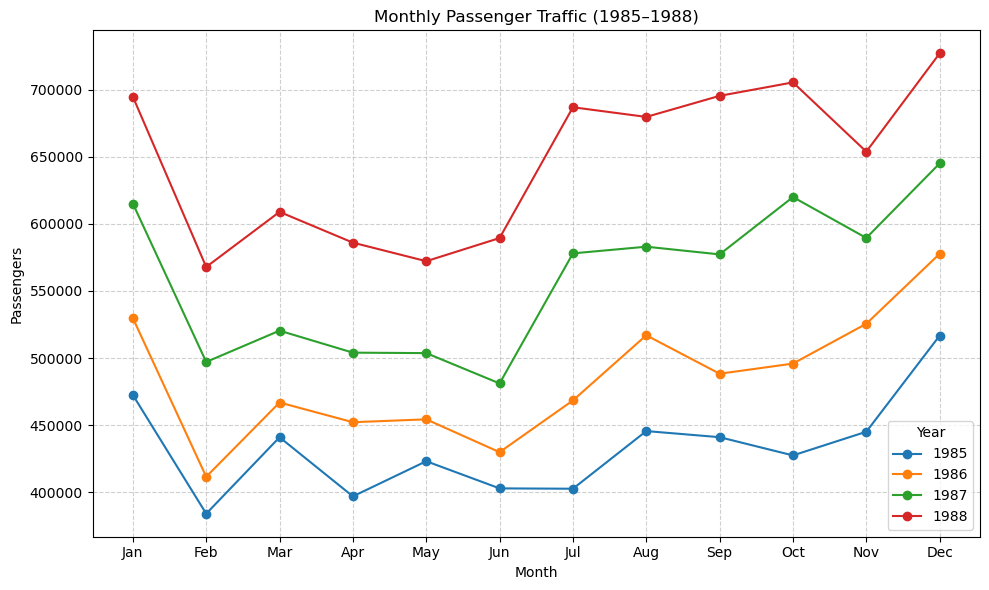

In [16]:
# Clean out 1989; not fully populated
years_of_interest = [1985, 1986, 1987, 1988]
subset = main_df[main_df["Year"].isin(years_of_interest)]

# Aggregate passenger totals by Year/Month
monthly_by_year = (
    subset.groupby(["Year", "Month_num"])["Passengers_Total"]
    .sum()
    .reset_index()
)

# turn years into columns
pivot = monthly_by_year.pivot(index="Month_num", columns="Year", values="Passengers_Total")

plt.figure(figsize=(10,6))
for year in pivot.columns:
    plt.plot(pivot.index, pivot[year], marker="o", label=str(year))

plt.title("Monthly Passenger Traffic (1985–1988)")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.xticks(range(1,13), [calendar.month_abbr[m] for m in range(1,13)])  # Jan–Dec labels
plt.legend(title="Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

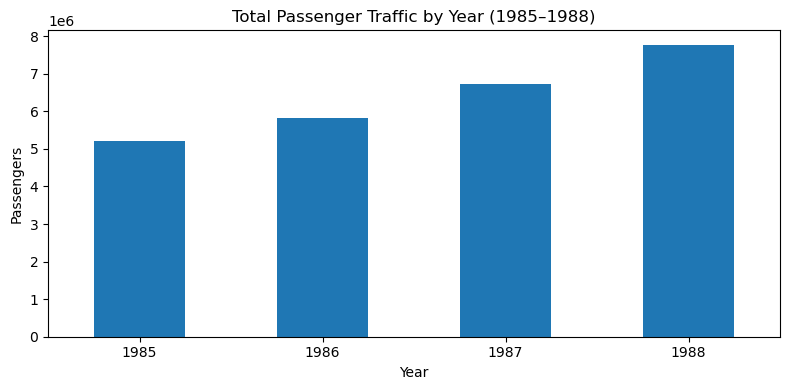

In [20]:
# Filter years
yrs = [1985, 1986, 1987, 1988]
df_8588 = main_df[main_df["Year"].isin(yrs)].copy()

# Total passengers per year
year_totals_8588 = (
    df_8588.groupby("Year")["Passengers_Total"]
    .sum()
    .reindex(yrs)
)

plt.figure(figsize=(8,4))
year_totals_8588.plot(kind="bar", rot=0)
plt.title("Total Passenger Traffic by Year (1985–1988)")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.tight_layout()
plt.show()


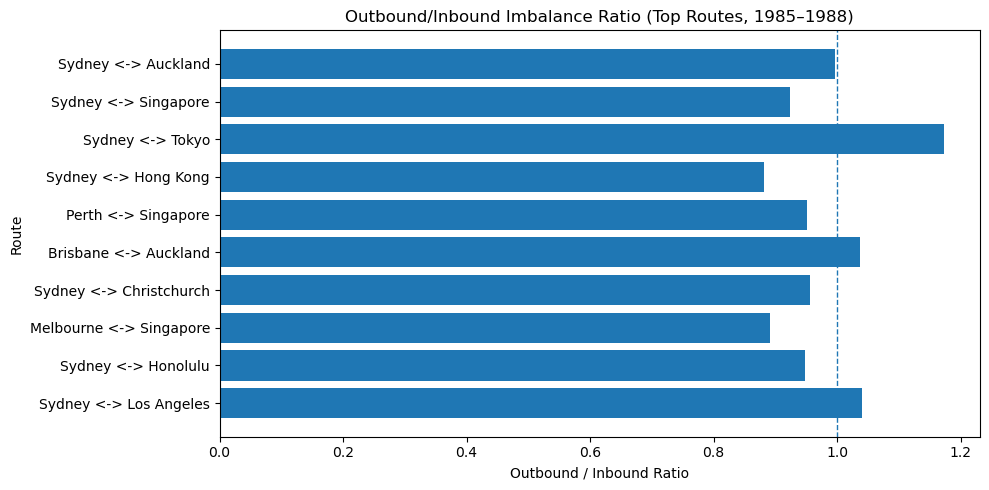

In [29]:
df_8588 = main_df[main_df["Year"].isin([1985,1986,1987,1988])].copy()

df_8588["Route"] = (
    df_8588["AustralianPort"].astype(str).str.strip().str.title()
    + " <-> " +
    df_8588["ForeignPort"].astype(str).str.strip().str.title()
)

agg = (
    df_8588.groupby("Route")[["Passengers_In", "Passengers_Out", "Passengers_Total"]]
    .sum()
    .sort_values("Passengers_Total", ascending=False)
)

# N city pairs
N = 10
top_routes = agg.head(N).copy()

# Imbalance ratio: Outbound / Inbound
# Make sure to clean div/0
top_routes["Out_In_Ratio"] = np.where(
    top_routes["Passengers_In"] > 0,
    top_routes["Passengers_Out"] / top_routes["Passengers_In"],
    np.nan
)

# Horizontal bars, sorted by total passengers so most popular routes on top
top_routes_plot = top_routes.iloc[::-1]  # reverse for horizontal bar order (largest at top)

plt.figure(figsize=(10,5))
plt.barh(top_routes_plot.index, top_routes_plot["Out_In_Ratio"])
plt.axvline(1.0, linestyle="--", linewidth=1)  # 1.0 = ratio of same amount of travelers to each city
plt.title("Outbound/Inbound Imbalance Ratio (Top Routes, 1985–1988)")
plt.xlabel("Outbound / Inbound Ratio")
plt.ylabel("Route")
plt.tight_layout()
plt.show()